# 3D Convolution

In [222]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import *


from matplotlib import animation
from IPython.display import HTML



In [223]:
images = torch.tensor([
    [[0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,1,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0]],
    [[0,0,0,0,0],
    [0,1,0,0,0],
    [0,0,1,0,0],
    [0,0,0,1,0],
    [0,0,0,0,0]],
    [[0,0,0,0,0],
    [0,0,0,0,0],
    [0,1,1,1,0],
    [0,0,0,0,0],
    [0,0,0,0,0]],
    [[0,0,0,0,0],
    [0,0,0,1,0],
    [0,0,1,0,0],
    [0,1,0,0,0],
    [0,0,0,0,0]]


]).float()


images = images.view(1,1,4,5,5)

images.shape

torch.Size([1, 1, 4, 5, 5])

In [224]:
fig = plt.figure(figsize=(10, 10))
ims = []
for i in range(4):
    im = plt.imshow(images[0,0,i,:,:], animated=True,cmap='gray')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True, repeat_delay=1000)
plt.close()

# Show the animation
HTML(ani.to_html5_video())

In [226]:
kernel = torch.tensor([
    [1,1,1],
    [1,-8,1],
    [1,1,1]
]).float().unsqueeze(0)


kernel2d = kernel.view(1,1,3,3)

In [252]:
conv2d = nn.Conv2d(1, 1, kernel_size=(3, 3), padding=1,bias=False)

conv2d.weight.data = kernel2d


image2d = images[:,:,3,:,:]


out = conv2d(image2d)

out

tensor([[[[ 0.,  0.,  1.,  1.,  1.],
          [ 0.,  1.,  2., -7.,  1.],
          [ 1.,  2., -6.,  2.,  1.],
          [ 1., -7.,  2.,  1.,  0.],
          [ 1.,  1.,  1.,  0.,  0.]]]], grad_fn=<MkldnnConvolutionBackward>)

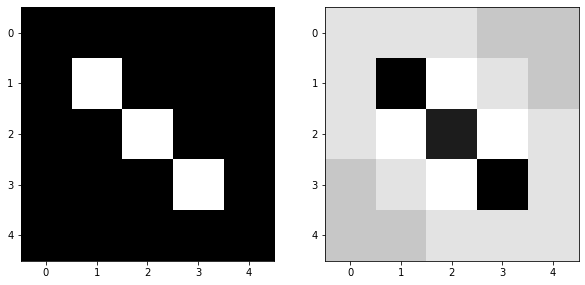

In [250]:

fig = plt.figure(figsize=(10, 10))

plt.subplot(1,2,1)
plt.imshow(image2d.view(5,5).detach().numpy(),cmap='gray')
plt.subplot(1,2.2,2)
plt.imshow(out.view(5,5).detach().numpy(),cmap='gray')

plt.show()

In [238]:
kernel3d = torch.cat([kernel,kernel, kernel],axis = 0).view(1,1,3,3,3)

conv3d = nn.Conv3d(1, 1, kernel_size=(3, 3, 3), padding=1,bias = False)


conv3d.weight.data = kernel3d


In [239]:
out = conv3d(images)

out

tensor([[[[[  1.,   2.,   2.,   1.,   0.],
           [  1.,  -5.,  -5.,   3.,   0.],
           [  1.,   5., -12.,   5.,   1.],
           [  0.,   3.,  -5.,  -5.,   1.],
           [  0.,   1.,   2.,   2.,   1.]],

          [[  1.,   2.,   2.,   1.,   0.],
           [  2.,  -3.,  -2.,   5.,   1.],
           [  2.,  -2., -18.,  -2.,   2.],
           [  1.,   5.,  -2.,  -3.,   2.],
           [  0.,   1.,   2.,   2.,   1.]],

          [[  1.,   1.,   2.,   1.,   1.],
           [  2.,  -4.,   7.,  -4.,   2.],
           [  3.,  -3., -18.,  -3.,   3.],
           [  2.,  -4.,   7.,  -4.,   2.],
           [  1.,   1.,   2.,   1.,   1.]],

          [[  0.,   0.,   1.,   1.,   1.],
           [  1.,   3.,   5.,  -5.,   2.],
           [  2.,  -5., -12.,  -5.,   2.],
           [  2.,  -5.,   5.,   3.,   1.],
           [  1.,   1.,   1.,   0.,   0.]]]]], grad_fn=<SlowConv3DBackward>)

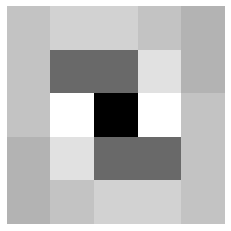

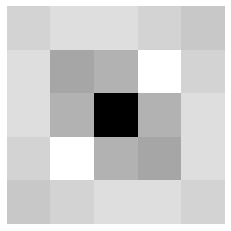

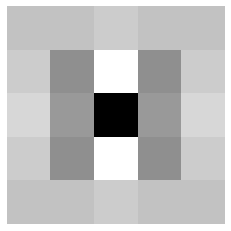

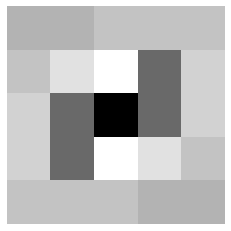

In [240]:
#fig = plt.figure(figsize=(10, 10))

#plt.subplot(2,2,1)
plt.imshow(out[0,0,0,:,:].detach().numpy(),cmap='gray')
plt.axis('off')
plt.show()
#plt.subplot(2,2,2)

plt.imshow(out[0,0,1,:,:].detach().numpy(),cmap='gray')
plt.axis('off')
plt.show()


#plt.subplot(2,2,3)
plt.imshow(out[0,0,2,:,:].detach().numpy(),cmap='gray')
plt.axis('off')
plt.show()


#plt.subplot(2,2,4)
plt.imshow(out[0,0,3,:,:].detach().numpy(),cmap='gray')
plt.axis('off')
plt.show()







In [241]:
fig = plt.figure(figsize=(10, 10))
ims = []
for i in range(4):
    im = plt.imshow(out[0,0,i,:,:].detach().numpy(), animated=True,cmap='gray')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True, repeat_delay=1000)
plt.close()

# Show the animation
HTML(ani.to_html5_video())

In [243]:
kernel3dext = torch.tensor([
    [[1,1,1],
    [1,1,1],
    [1,1,1]],
    [[1,1,1],
    [1,-26,1],
    [1,1,1]],
    [[1,1,1],
    [1,1,1],
    [1,1,1]]
]).float().view(1,1,3,3,3)

kernel3dext.shape

torch.Size([1, 1, 3, 3, 3])

In [244]:
newkernel = torch.cat([kernel3dext,kernel3d],axis = 0)

newkernel

tensor([[[[[  1.,   1.,   1.],
           [  1.,   1.,   1.],
           [  1.,   1.,   1.]],

          [[  1.,   1.,   1.],
           [  1., -26.,   1.],
           [  1.,   1.,   1.]],

          [[  1.,   1.,   1.],
           [  1.,   1.,   1.],
           [  1.,   1.,   1.]]]],



        [[[[  1.,   1.,   1.],
           [  1.,  -8.,   1.],
           [  1.,   1.,   1.]],

          [[  1.,   1.,   1.],
           [  1.,  -8.,   1.],
           [  1.,   1.,   1.]],

          [[  1.,   1.,   1.],
           [  1.,  -8.,   1.],
           [  1.,   1.,   1.]]]]])

In [245]:
conv3d = nn.Conv3d(1, 2, kernel_size=(3, 3, 3), padding=1,bias = False)


conv3d.weight.data = newkernel

In [246]:
out = conv3d(images)

out

tensor([[[[[  1.,   2.,   2.,   1.,   0.],
           [  1.,   4., -23.,   3.,   0.],
           [  1.,   5., -21.,   5.,   1.],
           [  0.,   3., -23.,   4.,   1.],
           [  0.,   1.,   2.,   2.,   1.]],

          [[  1.,   2.,   2.,   1.,   0.],
           [  2., -21.,   7.,   5.,   1.],
           [  2.,   7., -18.,   7.,   2.],
           [  1.,   5.,   7., -21.,   2.],
           [  0.,   1.,   2.,   2.,   1.]],

          [[  1.,   1.,   2.,   1.,   1.],
           [  2.,   5.,   7.,   5.,   2.],
           [  3., -21., -18., -21.,   3.],
           [  2.,   5.,   7.,   5.,   2.],
           [  1.,   1.,   2.,   1.,   1.]],

          [[  0.,   0.,   1.,   1.,   1.],
           [  1.,   3.,   5., -23.,   2.],
           [  2.,   4., -21.,   4.,   2.],
           [  2., -23.,   5.,   3.,   1.],
           [  1.,   1.,   1.,   0.,   0.]]],


         [[[  1.,   2.,   2.,   1.,   0.],
           [  1.,  -5.,  -5.,   3.,   0.],
           [  1.,   5., -12.,   5.,   1.],
 

In [221]:
fig = plt.figure(figsize=(10, 10))
ims = []
for i in range(4):
    im = plt.imshow(out[0,0,i,:,:].detach().numpy(), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True, repeat_delay=1000)
plt.close()

# Show the animation
HTML(ani.to_html5_video())


In [220]:

fig = plt.figure(figsize=(10, 10))
ims = []
for i in range(4):
    im = plt.imshow(out[0,1,i,:,:].detach().numpy(), animated=True)
    ims.append([im])

ani2 = animation.ArtistAnimation(fig, ims, interval=500, blit=True, repeat_delay=1000)
plt.close()

# Show the animation
HTML(ani2.to_html5_video())

In [255]:
kernel3dext.shape


conv3d = nn.Conv3d(1, 1, kernel_size=(3, 3, 3), padding=0,bias = False)


conv3d.weight.data = kernel3dext

In [256]:
out = conv3d(images)

out

tensor([[[[[-21.,   7.,   5.],
           [  7., -18.,   7.],
           [  5.,   7., -21.]],

          [[  5.,   7.,   5.],
           [-21., -18., -21.],
           [  5.,   7.,   5.]]]]], grad_fn=<SlowConv3DBackward>)

## 3D CNN con MNIST

In [ ]:
def array_to_color(array, cmap="Oranges"):
    s_m = plt.cm.ScalarMappable(cmap=cmap)
    return s_m.to_rgba(array)[:,:-1]


def rgb_data_transform(data):
    data_t = []
    for i in range(data.shape[0]):
        data_t.append(array_to_color(data[i]).reshape(16, 16, 16, 3))
    return np.asarray(data_t, dtype=np.float32)

Utilizziamo la versione 3D di mnist, disponibile su [kaggle](https://www.kaggle.com/daavoo/3d-mnist)

In [198]:
import h5py


with h5py.File("./data/full_dataset_vectors.h5", "r") as hf:    

    # Split the data into training/test features/targets
    X_train = hf["X_train"][:]
    targets_train = hf["y_train"][:]
    X_test = hf["X_test"][:] 
    targets_test = hf["y_test"][:]

    # Determine sample shape
    sample_shape = (16, 16, 16, 3)

    # Reshape data into 3D format
    X_train = rgb_data_transform(X_train)
    X_test = rgb_data_transform(X_test)

    # Convert target vectors to categorical targets
    #targets_train = to_categorical(targets_train).astype(np.integer)
    #targets_test = to_categorical(targets_test).astype(np.integer)

In [ ]:
train_x = torch.from_numpy(X_train).float()
train_y = torch.from_numpy(targets_train).long()
test_x = torch.from_numpy(X_test).float()
test_y = torch.from_numpy(targets_test).long()

batch_size = 4 #We pick beforehand a batch_size that we will use for the training


# Pytorch train and test sets
train = torch.utils.data.TensorDataset(train_x,train_y)
test = torch.utils.data.TensorDataset(test_x,test_y)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

In [6]:
num_classes = 10

# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.conv_layer1 = self._conv_layer_set(3, 32)
        self.conv_layer2 = self._conv_layer_set(32, 64)
        self.fc1 = nn.Linear(2**3*64, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.LeakyReLU()
        self.batch=nn.BatchNorm1d(128)
        self.drop=nn.Dropout(p=0.15)        
        
    def _conv_layer_set(self, in_c, out_c):
        conv_layer = nn.Sequential(
        nn.Conv3d(in_c, out_c, kernel_size=(3, 3, 3), padding=0),
        nn.LeakyReLU(),
        nn.MaxPool3d((2, 2, 2)),
        )
        return conv_layer
    

    def forward(self, x):
        # Set 1
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.batch(out)
        out = self.drop(out)
        out = self.fc2(out)
        
        return out

#Definition of hyperparameters
n_iters = 4500
num_epochs = n_iters / (len(train_x) / batch_size)
num_epochs = int(num_epochs)

# Create CNN
model = CNNModel()
#model.cuda()
print(model)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

CNNModel(
  (conv_layer1): Sequential(
    (0): Conv3d(3, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (batch): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.15, inplace=False)
)


In [15]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = torch.FloatTensor(images.view(100,3,16,16,16))
        labels = torch.tensor(labels)
        # Clear gradients
        optimizer.zero_grad()
        # Forward propagation
        outputs = model(train)
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        # Calculating gradients
        loss.backward()
        # Update parameters
        optimizer.step()
        
        count += 1
        if count % 5 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = torch.FloatTensor(images.view(100,3,16,16,16))
                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
#        if count % 50 == 0:
            # Print Loss
            print('Iteration: {}\t | Loss: {:.5f}\t | Accuracy: {:.2f}%'.format(count, loss.data, accuracy))

/Users/beppe/opt/anaconda3/envs/ptc/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


Iteration: 5	 | Loss: 1.69156	 | Accuracy: 39.00%
Iteration: 10	 | Loss: 1.72752	 | Accuracy: 39.10%
Iteration: 15	 | Loss: 1.88429	 | Accuracy: 40.00%
Iteration: 20	 | Loss: 1.82297	 | Accuracy: 39.45%
Iteration: 25	 | Loss: 1.94511	 | Accuracy: 40.70%
Iteration: 30	 | Loss: 1.77674	 | Accuracy: 39.35%
Iteration: 35	 | Loss: 1.61041	 | Accuracy: 40.25%
Iteration: 40	 | Loss: 1.75526	 | Accuracy: 40.35%
Iteration: 45	 | Loss: 1.76682	 | Accuracy: 40.95%
Iteration: 50	 | Loss: 1.83814	 | Accuracy: 40.80%
Iteration: 55	 | Loss: 1.77769	 | Accuracy: 39.00%
Iteration: 60	 | Loss: 1.76622	 | Accuracy: 40.10%
Iteration: 65	 | Loss: 1.82384	 | Accuracy: 40.15%
Iteration: 70	 | Loss: 1.84822	 | Accuracy: 40.70%
Iteration: 75	 | Loss: 1.71790	 | Accuracy: 40.50%
Iteration: 80	 | Loss: 1.78242	 | Accuracy: 41.10%
Iteration: 85	 | Loss: 1.75609	 | Accuracy: 41.20%
Iteration: 90	 | Loss: 1.70679	 | Accuracy: 40.85%
Iteration: 95	 | Loss: 1.75112	 | Accuracy: 41.00%
Iteration: 100	 | Loss: 1.57677	

KeyboardInterrupt: 

# Recurrent Neural Networks


# Optical Flow